# 🚢Titanic Survival Prediction Model

* Data set can be downloaded from [kaggle](https://www.kaggle.com/c/titanic/data)

* Problem defination : Given the dataset of passengers and their survival , model must predict the survival rate of new data


### Importing primary modules for Exploratory data analysis

In [1]:
import numpy as np         # For creating matrices and for number operations
import pandas as pd        # For manipulating and reading data
import matplotlib.pyplot as plt      # for ploting graphs
import seaborn as sns      # To plot heatmaps

In [2]:
# Reading data from csv file with pandas
df = pd.read_csv("Data/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Cheaking the datatypes and iother info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

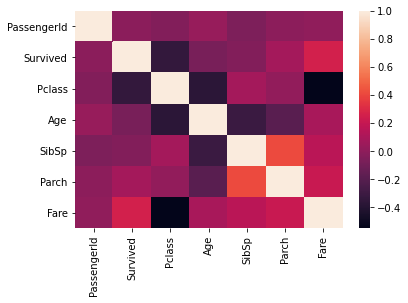

In [4]:
# Plotting correlation matric on sns heatmap
sns.heatmap(df.corr())

In [5]:
# Fining the survical rate stats
df["Survived"].value_counts()  

0    549
1    342
Name: Survived, dtype: int64

### Since the values are biased , accuracy is not the suitable evaluation metrics . We can consider Area under ROC or F1 score as the evaluation metrics for our model training. 

In [6]:
# Since Name , PassengerId are unique for each data sample , we can drop these cells as they wont contribute for model.
df.drop(["Name" , "PassengerId"] , axis = 1 , inplace = True)

In [7]:
# Grouping and finding the corresponding dependencies
def grouping(df):
    for title in df.columns:
        res = df["Survived"].groupby(df[title]).mean()
        print(f"Comparision of {title} with Survival rate is ")
        print(res)
        print("\n")

grouping(df)        

Comparision of Survived with Survival rate is 
Survived
0    0
1    1
Name: Survived, dtype: int64


Comparision of Pclass with Survival rate is 
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Comparision of Sex with Survival rate is 
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Comparision of Age with Survival rate is 
Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64


Comparision of SibSp with Survival rate is 
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


Comparision of Parch with Survival rate is 
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


Comparision of Ticket with Survival rate is 
Ticket
110152 

In [8]:
# Finding missing values
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# Since most of the Embarked is "S" , we can fill the null value with "S"
df["Embarked"].fillna("S" , inplace = True)
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
df["Cabin"].unique() , df["Cabin"].value_counts()

(array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
        'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
        'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
        'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
        'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
        'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
        'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
        'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
        'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
        'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
        'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
        'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
        'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
        'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
   

In [12]:
# Since most of the Cabin data is missing we can drop the Cabin column
df.drop(["Cabin"] , axis = 1 , inplace = True)
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [13]:
len(df["Ticket"].unique()) , df["Ticket"].value_counts()

(681,
 347082      7
 1601        7
 CA. 2343    7
 CA 2144     6
 3101295     6
            ..
 248706      1
 349224      1
 368323      1
 376566      1
 330931      1
 Name: Ticket, Length: 681, dtype: int64)

In [14]:
# Also since most of the tickets are unique values , we can drop ticket column
df.drop(["Ticket"] , axis = 1 , inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [15]:
# Lets split the training and the test data
from sklearn.model_selection import train_test_split
X = df.drop(["Survived"] , axis = 1)
y = df["Survived"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(712, 179, 712, 179)

In [16]:
# Now fill the missing values , we do hear to avoid data leakage.
median = X_train["Age"].median()
X_train["Age"].fillna(median , inplace = True)
X_test["Age"].fillna(median , inplace = True)

C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
# Normalizing the numerical data for easy computation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[["Age" , "Fare"]] = scaler.fit_transform(X_train[["Age" , "Fare"]])
X_test[["Age" , "Fare"]] = scaler.transform(X_test[["Age" , "Fare"]])

<ipython-input-17-638a3763d195>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[["Age" , "Fare"]] = scaler.fit_transform(X_train[["Age" , "Fare"]])
C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-17-638a3763d195>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [18]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,0.566474,0,0,0.055628,S
733,2,male,0.283740,0,0,0.025374,S
382,3,male,0.396833,0,0,0.015469,S
704,3,male,0.321438,1,0,0.015330,S
813,3,female,0.070118,4,2,0.061045,S


### Converting Categorical Variables into Numerical can be achieved from many techniques.
* Label Encoding
* One hot encoding
* Replacing Values
* Binary Encoding

[Refer Here for more details](https://www.datacamp.com/community/tutorials/categorical-data)

In [19]:
# Here we use onehot encoding...
# Its always adviced to store previous df when performing these operations
X_train_temp = X_train.copy()
X_train_temp = pd.get_dummies(X_train_temp , columns = ["Sex" , "Embarked"] , prefix = ["Sex" , "Embarked"])

In [20]:
# Performing on the original data set
X_train = pd.get_dummies(X_train , columns = ["Sex" , "Embarked"] , prefix = ["Sex" , "Embarked"])
X_test = pd.get_dummies(X_test , columns = ["Sex" , "Embarked"] , prefix = ["Sex" , "Embarked"])

## Creating model

### We have many classification algorithems , we can choose one by evaluating on the test dataset :
* Logestic Regression
* Random Forest Classifier
* KNeighbours Classifier
* Linear SVM

### Coming to evaluation metrics , since its is baised classification , we use :
* Area Under ROC
* F1 score
* Classification Report (Optional)

### Loading all modules for Modeling and Evaluating

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report , f1_score , roc_auc_score

In [22]:
random = RandomForestClassifier(random_state = 42)
linear = LogisticRegression()
neighbor = KNeighborsClassifier()
svm = svm.SVC()

### Fitting into all models

In [23]:
random.fit(X_train , y_train)
linear.fit(X_train , y_train)
neighbor.fit(X_train , y_train)
svm.fit(X_train , y_train)

SVC()

### Getting scores

In [24]:
print(random.score(X_train , y_train))
print(linear.score(X_train , y_train))
print(neighbor.score(X_train , y_train))
print(svm.score(X_train , y_train))

0.9789325842696629
0.8047752808988764
0.8469101123595506
0.8132022471910112


### Getting predictions

In [25]:
random_preds = random.predict(X_test)
linear_preds = linear.predict(X_test)
neighbor_preds = neighbor.predict(X_test)
svm_preds = svm.predict(X_test)

### Evaluating their metrics

In [26]:
def metrics(y_test , preds):
    print(f1_score(y_test , preds))
    print(roc_auc_score(y_test , preds))

print("Random")
metrics(y_test , random_preds)
print("\n")

print("Linear")
metrics(y_test , linear_preds)
print("\n")

print("Neighbors")
metrics(y_test , neighbor_preds)
print("\n")

print("Svm")
metrics(y_test , svm_preds)
print("\n")

Random
0.7586206896551724
0.7954311454311453


Linear
0.75
0.7886743886743887


Neighbors
0.7428571428571429
0.7846846846846847


Svm
0.7391304347826088
0.7826898326898326




## Hyper Parameter Tuning

In [27]:
# We can eliminate svm  as it has low score , for grids for grid search cv opeartion.

grid_random = {"n_estimators" : [100 , 120 , 150 , 175 , 200 , 500],
              "bootstrap" : [True , False] , 
              "max_features" : ['auto', 'sqrt'] , 
              "min_samples_leaf" : [1, 2, 4] , 
              "class_weight" : ["balanced", "balanced_subsample"] , 
              "random_state" : [42]}

grid_linear = {"max_iter" : [100 , 150 , 200 , 250 , 500] , 
              "solver" : ["liblinear"] , 
              "multi_class" : ["ovr"] , 
              "random_state" : [42]}

grid_neighbor = {"n_neighbors" : [3 , 5 , 7 , 10] , 
                "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]} 

In [28]:
# Applying hyperparameters with Crossvalidation and GridsearchCV
from sklearn.model_selection import GridSearchCV

model_random = GridSearchCV(RandomForestClassifier() , param_grid = grid_random, cv = 5, verbose=2)
model_linear = GridSearchCV(LogisticRegression() , param_grid = grid_linear, cv = 5, verbose=2)
model_neighbor = GridSearchCV(KNeighborsClassifier() , param_grid = grid_neighbor, cv = 5, verbose=2)

In [29]:
# Fitting into Grid Secarh Cv
model_linear.fit(X_train , y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] max_iter=100, multi_class=ovr, random_state=42, solver=liblinear 
[CV]  max_iter=100, multi_class=ovr, random_state=42, solver=liblinear, total=   0.0s
[CV] max_iter=100, multi_class=ovr, random_state=42, solver=liblinear 
[CV]  max_iter=100, multi_class=ovr, random_state=42, solver=liblinear, total=   0.0s
[CV] max_iter=100, multi_class=ovr, random_state=42, solver=liblinear 
[CV]  max_iter=100, multi_class=ovr, random_state=42, solver=liblinear, total=   0.0s
[CV] max_iter=100, multi_class=ovr, random_state=42, solver=liblinear 
[CV]  max_iter=100, multi_class=ovr, random_state=42, solver=liblinear, total=   0.0s
[CV] max_iter=100, multi_class=ovr, random_state=42, solver=liblinear 
[CV]  max_iter=100, multi_class=ovr, random_state=42, solver=liblinear, total=   0.0s
[CV] max_iter=150, multi_class=ovr, random_state=42, solver=liblinear 
[CV]  max_iter=150, multi_class=ovr, random_state=42, solver=liblinear, total=   0.0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 150, 200, 250, 500],
                         'multi_class': ['ovr'], 'random_state': [42],
                         'solver': ['liblinear']},
             verbose=2)

In [30]:
model_random.fit(X_train , y_train)
model_random.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=100, random_state=42, total=   0

[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=100, random_state=42, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=100, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=100, random_state=42, total=   0.1s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=120, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=120, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=120, random_state=

[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=120, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=120, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=150, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=150, random_state=

[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=150, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=150, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=150, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=150, random_state=

[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=

[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=175, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=175, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=

[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_s

[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_s

[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_s

[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=500, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=500, random_state=42, total=   0.9s
[CV] bootstrap=True, class_weight=balanced_s

[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=200, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.4s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=500, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=500, random_state=42, total=   0.9s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=500, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=500, random_state=42, total=   0.9s
[CV] bootstrap=True, class_weight=balanced_s

[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=500, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=500, random_state=42, total=   0.9s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=500, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=500, random_state=42, total=   0.9s
[CV] bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=500, random_state=42 
[CV]  bootstrap=True, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=500, random_state=42, total=   0.9s
[CV] bootstrap=True, class_weight=balanced_s

[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=42, total=   0.7s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=42, total=   0.7s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=42, total=   0.7s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=1, n_estimators=500, random_state=42, total=   0.7s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=100, rando

[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=2, n_estimators=500, random_state=42, total=   0.6s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=100, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=100, random_state=42, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=100, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=100, random_state=42, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=100, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=100, random_state=42, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=auto, min_samples_leaf=4, n_estimators=100, rando

[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=100, random_state=42, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=100, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=100, random_state=42, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=120, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=120, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=1, n_estimators=120, rando

[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=120, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=120, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=120, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=150, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=2, n_estimators=150, rando

[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=150, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=150, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=150, random_state=42 
[CV]  bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced, max_features=sqrt, min_samples_leaf=4, n_estimators=175, rando

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=150, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=1, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=ba

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=ba

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=auto, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=ba

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=175, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=1, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=ba

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=200, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=200, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=2, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=ba

[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=175, random_state=42, total=   0.2s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42 
[CV]  bootstrap=False, class_weight=balanced_subsample, max_features=sqrt, min_samples_leaf=4, n_estimators=200, random_state=42, total=   0.3s
[CV] bootstrap=False, class_weight=ba

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  3.7min finished


{'bootstrap': True,
 'class_weight': 'balanced',
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 150,
 'random_state': 42}

In [31]:
print(model_linear.best_params_)
print(linear.score(X_test , y_test))
print(model_linear.score(X_test , y_test))

{'max_iter': 100, 'multi_class': 'ovr', 'random_state': 42, 'solver': 'liblinear'}
0.7988826815642458
0.7932960893854749


In [32]:
model_neighbor.fit(X_train , y_train)
model_neighbor.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] algorithm=auto, n_neighbors=3 ...................................
[CV] .................... algorithm=auto, n_neighbors=3, total=   0.0s
[CV] algorithm=auto, n_neighbors=5 ...................................
[CV] .................... algorithm=auto, n_neighbors=5, total=   0.0s
[CV] algorithm=auto, n_neighbors=5 ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... algorithm=auto, n_neighbors=7, total=   0.0s
[CV] algorithm=auto, n_neighbors=7 ...................................
[CV] .................... algorithm=auto, n_neighbors=7, total=   0.0s
[CV] algorithm=auto, n_neighbors=10 ..................................
[CV] ................... algorithm=auto, n_neighbors=10, total=   0.0s
[CV] algorithm=auto, n_neighbors=10 ..................................
[CV] ................... algorithm=auto, n_neighbors=10, total=   0.0s
[CV] algorithm=auto, n_neighbors=10 ..................................
[CV] ................... algorithm=auto, n_neighbors=10, total=   0.0s
[CV] algorithm=auto, n_neighbors=10 ..................................
[CV] ................... algorithm=auto, n_neighbors=10, total=   0.0s
[CV] algorithm=auto, n_neighbors=10 ..................................
[CV] ................... algorithm=auto, n_neighbors=10, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=3 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.8s finished


{'algorithm': 'auto', 'n_neighbors': 10}

## Getting preds after hyperparameter tuning

In [33]:
final_random_preds = model_random.predict(X_test)
final_linear_preds = model_linear.predict(X_test)
final_neighbor_preds = model_neighbor.predict(X_test)

In [34]:
print("Random")
metrics(y_test , final_random_preds)
print("\n")

print("Linear")
metrics(y_test , final_linear_preds)
print("\n")

print("Neighbors")
metrics(y_test , final_neighbor_preds)
print("\n")

Random
0.7945205479452055
0.8252252252252252


Linear
0.7412587412587412
0.781917631917632


Neighbors
0.7313432835820896
0.7787001287001287




From above observation , we will finalize RandomForestClassifier

In [35]:
random.score(X_test , y_test) # Before tuning

0.8044692737430168

In [36]:
model_random.score(X_test , y_test)   #After tuning

0.8324022346368715

In [37]:
print(classification_report(y_test , random_preds))  # Before tuning

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



In [38]:
print(classification_report(y_test , final_random_preds))  # After tuning

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



## Getting Ready for the final submission

In [39]:
# Reading test dataset
test = pd.read_csv("Data/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
# Drop Name , passengerId , Cabin , Ticket
passengers = test["PassengerId"]  # Storing for final use.
test.drop(["Name" , "PassengerId" , "Cabin" , "Ticket"] , axis = 1 , inplace = True)

In [41]:
# Getting basic info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [42]:
# Cheaking for missing value
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [43]:
# Filling missing age and fare values with median.
test["Age"].fillna(df["Age"].median() , inplace = True)  # To be filled with age of larger data set
test["Fare"].fillna(df["Fare"].median() , inplace = True)

# Cheaking for any missing values
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [44]:
# Normalizing the numerical data for easy computation
test[["Age" , "Fare"]] = scaler.transform(test[["Age" , "Fare"]])

In [45]:
# Creating dummie columns for categorical values
test = pd.get_dummies(test , columns = ["Sex" , "Embarked"] , prefix = ["Sex" , "Embarked"])

In [46]:
# Chaeking for any errors
test.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.428248,0,0,0.015282,0,1,0,1,0
1,3,0.585323,1,0,0.013663,1,0,0,0,1
2,2,0.773813,0,0,0.018909,0,1,0,1,0
3,3,0.334004,0,0,0.016908,0,1,0,0,1
4,3,0.271174,1,1,0.023984,1,0,0,0,1
5,3,0.170646,0,0,0.018006,0,1,0,0,1
6,3,0.371701,0,0,0.014891,1,0,0,1,0
7,2,0.321438,1,1,0.056604,0,1,0,0,1
8,3,0.220910,0,0,0.014110,1,0,1,0,0
9,3,0.258608,2,0,0.047138,0,1,0,0,1


## Fitting the RandomForestClassifier model to the test data

In [47]:
test_preds = model_random.predict(test)
test_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Forming Dataframe for final submission

In [48]:
data = {"PassengerId" : passengers , 
       "Survived" : test_preds}

In [49]:
# Creating DataFrame with Pandas
final = pd.DataFrame(data , columns = ["PassengerId" , "Survived"])
final.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


## Exporting predictions to .csv file

In [50]:
final.to_csv("Titanic_github.csv" , index = False)